# Effects of Alcohol on Student Performance


## Importing the Libraries

In [1]:
import numpy as np  # NumPy for numerical operations and linear algebra
import pandas as pd  # Pandas for data processing and handling CSV files
import seaborn as sns  # Seaborn for statistical data visualization
import matplotlib.pyplot as plt  # Matplotlib for plotting
import plotly.express as px  # Plotly for interactive data visualization

## Importing the data set

In [2]:
df = pd.read_csv("Stats survey.csv")  # Read the CSV file into a DataFrame
df.head()  # Display the first few rows of the DataFrame

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


## Renaming the columns


In [3]:
new_cols = {
    df.columns[1]: "Gender",  # Rename the second column to 'Gender'
    df.columns[2]: "Overall GPA, %",  # Rename the third column to 'Overall GPA, %'
    df.columns[3]: "Year",  # Rename the fourth column to 'Year'
    df.columns[4]: "Faculty",  # Rename the fifth column to 'Faculty'
    df.columns[5]: "2023 year GPA, %",  # Rename the sixth column to '2023 year GPA, %'
    df.columns[6]: "Accommodation 2023",  # Rename the seventh column to 'Accommodation 2023'
    df.columns[8]: "Scholarship Student",  # Rename the ninth column to 'Scholarship Student'
    df.columns[9]: "Additional Study hours",  # Rename the tenth column to 'Additional Study hours'
    df.columns[10]: "Socialising, partying, drinking",  # Rename the eleventh column to 'Socialising, partying, drinking'
    df.columns[11]: "Number of drinks",  # Rename the twelfth column to 'Number of drinks'
    df.columns[12]: "Skipped classes because of alcohol",  # Rename the thirteenth column to 'Skipped classes because of alcohol'
    df.columns[13]: "Failed modules",  # Rename the fourteenth column to 'Failed modules'
    df.columns[14]: "Relationship",  # Rename the fifteenth column to 'Relationship'
    df.columns[15]: "Parent approval",  # Rename the sixteenth column to 'Parent approval'
    df.columns[16]: "Bonding with parents"  # Rename the seventeenth column to 'Bonding with parents'
}


In [4]:
# Renaming the DataFrame columns using the new_cols dictionary
df.rename(columns=new_cols, inplace=True)  # Apply the new column names to the DataFrame


In [5]:
df.head(5)  # Display the first few rows of the DataFrame

,Timestamp,Gender,"Overall GPA, %",Year,Faculty,"2023 year GPA, %",Accommodation 2023,Monthly Allowance in 2023,Scholarship Student,Additional Study hours,"Socialising, partying, drinking",Number of drinks,Skipped classes because of alcohol,Failed modules,Relationship,Parent approval,Bonding with parents
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


## clean the data

In [6]:
df.isnull().sum()  # Check for missing values


,0
Timestamp,0
Gender,2
"Overall GPA, %",7
Year,73
Faculty,7
"2023 year GPA, %",86
Accommodation 2023,23
Monthly Allowance in 2023,31
Scholarship Student,8
Additional Study hours,3


In [7]:
df.dropna(inplace=True)  # Remove rows with missing values


In [8]:
df.isnull().sum()  # Check for missing values


,0
Timestamp,0
Gender,0
"Overall GPA, %",0
Year,0
Faculty,0
"2023 year GPA, %",0
Accommodation 2023,0
Monthly Allowance in 2023,0
Scholarship Student,0
Additional Study hours,0


## Encoding the catogorical data


In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to the specified columns
df['Gender'] = le.fit_transform(df['Gender'])
df['Number of drinks'] = le.fit_transform(df['Number of drinks'])
df['Socialising, partying, drinking'] = le.fit_transform(df['Socialising, partying, drinking'])
df['Relationship'] = le.fit_transform(df['Relationship'])
df['Parent approval'] = le.fit_transform(df['Parent approval'])


In [10]:
# Display the transformed DataFrame
print(df)

                     Timestamp  Gender  Overall GPA, %      Year  \
0    2024/03/07 5:12:01 pm EET       0            76.0  2nd Year   
1    2024/03/07 5:12:08 pm EET       1            89.0  2nd Year   
2    2024/03/07 5:12:25 pm EET       1            76.0  1st Year   
3    2024/03/07 5:12:28 pm EET       1            89.0  2nd Year   
4    2024/03/07 5:13:00 pm EET       0            74.0  2nd Year   
..                         ...     ...             ...       ...   
395  2024/03/11 4:40:28 pm EET       1            75.0  2nd Year   
396  2024/03/11 4:41:08 pm EET       0            78.0  2nd Year   
397  2024/03/11 5:11:29 pm EET       1            86.0  1st Year   
398  2024/03/11 5:45:20 pm EET       0            74.0  2nd Year   
402  2024/03/12 3:26:14 pm EET       0            73.0  2nd Year   

                            Faculty  2023 year GPA, %  \
0            Arts & Social Sciences              72.0   
1    Economic & Management Sciences              75.0   
2           

In [11]:
df.head()

,Timestamp,Gender,"Overall GPA, %",Year,Faculty,"2023 year GPA, %",Accommodation 2023,Monthly Allowance in 2023,Scholarship Student,Additional Study hours,"Socialising, partying, drinking",Number of drinks,Skipped classes because of alcohol,Failed modules,Relationship,Parent approval,Bonding with parents
0,2024/03/07 5:12:01 pm EET,0,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,5,4,3,0,1,1,Very close
1,2024/03/07 5:12:08 pm EET,1,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,5,2,4+,0,0,1,Very close
2,2024/03/07 5:12:25 pm EET,1,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,4,3,0,0,1,Very close
3,2024/03/07 5:12:28 pm EET,1,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,4,2,0,1,1,Very close
4,2024/03/07 5:13:00 pm EET,0,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,5,3,1,3,0,1,Fair


## Defining the Target Variable

In [12]:
x = df[['Gender', 'Number of drinks', 'Skipped classes because of alcohol',"Parent approval" ,"Socialising, partying, drinking" ]]
y = df['2023 year GPA, %']  # or 'Overall GPA'


In [13]:
print(x)

     Gender  Number of drinks Skipped classes because of alcohol  \
0         0                 4                                  3   
1         1                 2                                 4+   
2         1                 4                                  3   
3         1                 4                                  2   
4         0                 3                                  1   
..      ...               ...                                ...   
395       1                 4                                 4+   
396       0                 1                                  0   
397       1                 2                                  2   
398       0                 1                                  0   
402       0                 4                                  0   

     Parent approval  Socialising, partying, drinking  
0                  1                                5  
1                  1                                5  
2              

In [14]:
print(y)

0      72.0
1      75.0
2      55.0
3      84.0
4      52.0
       ... 
395    80.0
396    74.0
397    70.0
398    60.0
402    58.0
Name: 2023 year GPA, %, Length: 295, dtype: float64


In [15]:
# Change 'Number of drinks' to numbers; if there's a problem, use 4 instead of missing values
x['Number of drinks'] = pd.to_numeric(x['Number of drinks'], errors='coerce').fillna(4)

# Change 'Skipped classes because of alcohol' to numbers; if there's a problem, use 4 instead of missing values
x['Skipped classes because of alcohol'] = pd.to_numeric(x['Skipped classes because of alcohol'], errors='coerce').fillna(4)

# Change 'Parent approval' to numbers; if there's a problem, use 4 instead of missing values
x['Parent approval'] = pd.to_numeric(x['Parent approval'], errors='coerce').fillna(4)


<ipython-input-15-a763117ff1d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Number of drinks'] = pd.to_numeric(x['Number of drinks'], errors='coerce').fillna(4)
<ipython-input-15-a763117ff1d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Skipped classes because of alcohol'] = pd.to_numeric(x['Skipped classes because of alcohol'], errors='coerce').fillna(4)
<ipython-input-15-a763117ff1d2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [16]:
print(x)

     Gender  Number of drinks  Skipped classes because of alcohol  \
0         0                 4                                 3.0   
1         1                 2                                 4.0   
2         1                 4                                 3.0   
3         1                 4                                 2.0   
4         0                 3                                 1.0   
..      ...               ...                                 ...   
395       1                 4                                 4.0   
396       0                 1                                 0.0   
397       1                 2                                 2.0   
398       0                 1                                 0.0   
402       0                 4                                 0.0   

     Parent approval  Socialising, partying, drinking  
0                  1                                5  
1                  1                                5  
2  

## Splitting the dataset into the Training set and Test set

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


## Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [19]:
print(x_train)

[[-1.09800158 -0.34631786 -0.02058904  0.37429483 -0.45322827]
 [-1.09800158  0.48767209 -0.83042448  0.37429483  1.3596848 ]
 [ 0.9107455   1.32166204  0.78924641  0.37429483 -0.45322827]
 ...
 [ 0.9107455  -0.34631786  1.59908186  0.37429483 -0.45322827]
 [ 0.9107455  -1.18030781 -0.83042448 -2.67169067 -1.05753262]
 [ 0.9107455   0.48767209  2.4089173   0.37429483  0.15107609]]


In [20]:
print(x_test)

[[ 0.9107455  -2.01429776 -0.83042448  0.37429483 -1.66183697]
 [ 0.9107455   1.32166204 -0.83042448  0.37429483 -0.45322827]
 [ 0.9107455  -0.34631786 -0.83042448  0.37429483 -1.05753262]
 [-1.09800158  0.48767209  0.78924641 -2.67169067  1.3596848 ]
 [ 0.9107455   1.32166204  0.78924641  0.37429483  0.15107609]
 [-1.09800158 -0.34631786 -0.83042448  0.37429483 -1.05753262]
 [-1.09800158  0.48767209  0.78924641  0.37429483  1.3596848 ]
 [-1.09800158 -0.34631786  1.59908186  0.37429483 -0.45322827]
 [-1.09800158 -0.34631786 -0.83042448  0.37429483  1.3596848 ]
 [-1.09800158 -1.18030781 -0.83042448  0.37429483 -0.45322827]
 [ 0.9107455  -0.34631786 -0.83042448  0.37429483  1.3596848 ]
 [ 0.9107455   1.32166204 -0.83042448  0.37429483  0.15107609]
 [-1.09800158  1.32166204 -0.83042448  0.37429483 -1.05753262]
 [-1.09800158 -1.18030781 -0.83042448  0.37429483  0.15107609]
 [ 0.9107455   0.48767209 -0.83042448  0.37429483 -1.05753262]
 [-1.09800158  0.48767209 -0.83042448  0.37429483 -0.45

## Training the SVM model on the Training set

In [21]:
from sklearn.svm import SVR

model = SVR(kernel='linear')  # You can experiment with different kernels (linear, rbf, etc.)
model.fit(x_train, y_train)


SVR(kernel='linear')

## Model evaluation

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 68.76470834258132
R² Score: 0.15386482145322522


## Fine tuning

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5]}
grid = GridSearchCV(SVR(), param_grid, refit=True)
grid.fit(x_train, y_train)


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5]})

## Visualizing the Training set results for No. of drinks vs gpa

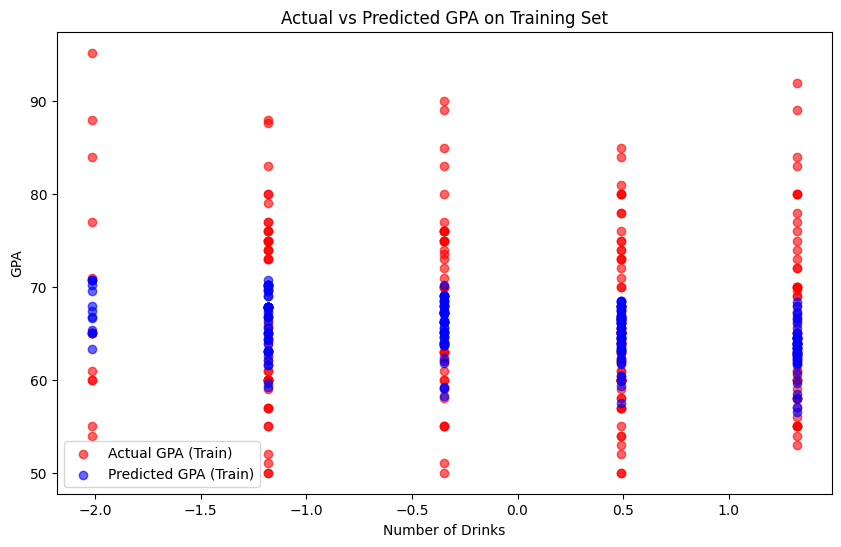

In [24]:
# Visualizing the Training set results
plt.figure(figsize=(10, 6))

# Scatter plot of actual GPAs in the training set
plt.scatter(x_train[:, 1], y_train, color='red', label='Actual GPA (Train)', alpha=0.6)

# Scatter plot of predicted GPAs in the training set
plt.scatter(x_train[:, 1], model.predict(x_train), color='blue', label='Predicted GPA (Train)', alpha=0.6)

# Add titles and labels
plt.title('Actual vs Predicted GPA on Training Set')
plt.xlabel('Number of Drinks')
plt.ylabel('GPA')
plt.legend()

# Show the plot
plt.show()

## Visualizing the Test set results for no. of drinks vs gpa

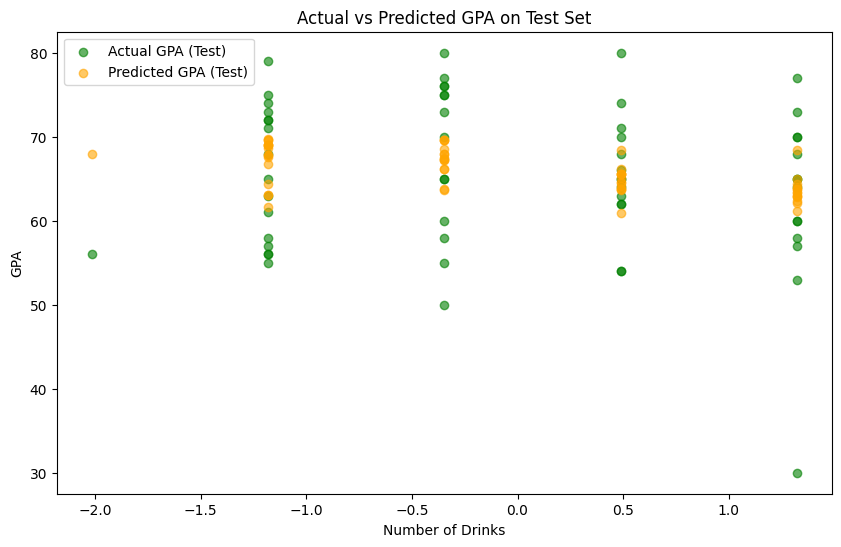

In [25]:
# Visualizing the Test set results
plt.figure(figsize=(10, 6))

# Scatter plot of actual GPAs in the test set
plt.scatter(x_test[:, 1], y_test, color='green', label='Actual GPA (Test)', alpha=0.6)

# Scatter plot of predicted GPAs in the test set
plt.scatter(x_test[:, 1], y_pred, color='orange', label='Predicted GPA (Test)', alpha=0.6)

# Add titles and labels
plt.title('Actual vs Predicted GPA on Test Set')
plt.xlabel('Number of Drinks')
plt.ylabel('GPA')
plt.legend()

# Show the plot
plt.show()


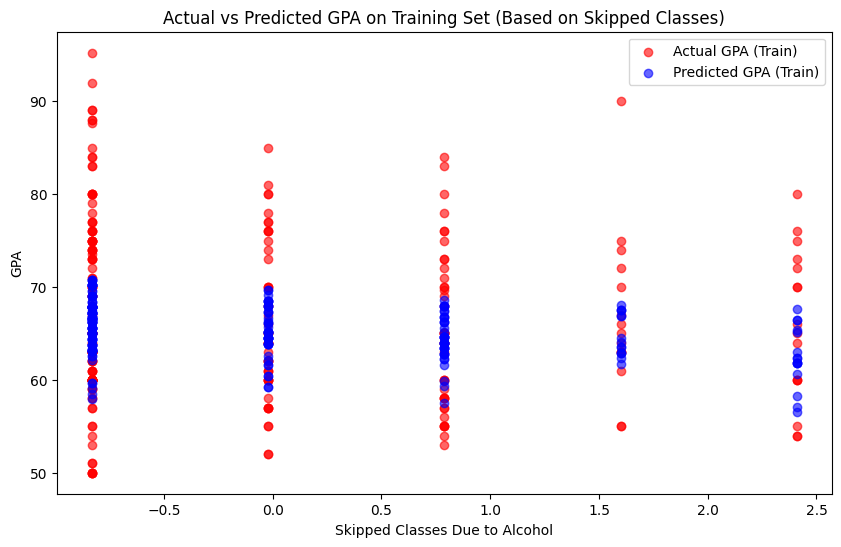

In [26]:
# Visualizing the Training set results for GPA vs. Skipped Classes
plt.figure(figsize=(10, 6))

# Scatter plot of actual GPAs in the training set against skipped classes
plt.scatter(x_train[:, 2], y_train, color='red', label='Actual GPA (Train)', alpha=0.6)

# Scatter plot of predicted GPAs in the training set against skipped classes
plt.scatter(x_train[:, 2], model.predict(x_train), color='blue', label='Predicted GPA (Train)', alpha=0.6)

# Add titles and labels
plt.title('Actual vs Predicted GPA on Training Set (Based on Skipped Classes)')
plt.xlabel('Skipped Classes Due to Alcohol')
plt.ylabel('GPA')
plt.legend()

# Show the plot
plt.show()


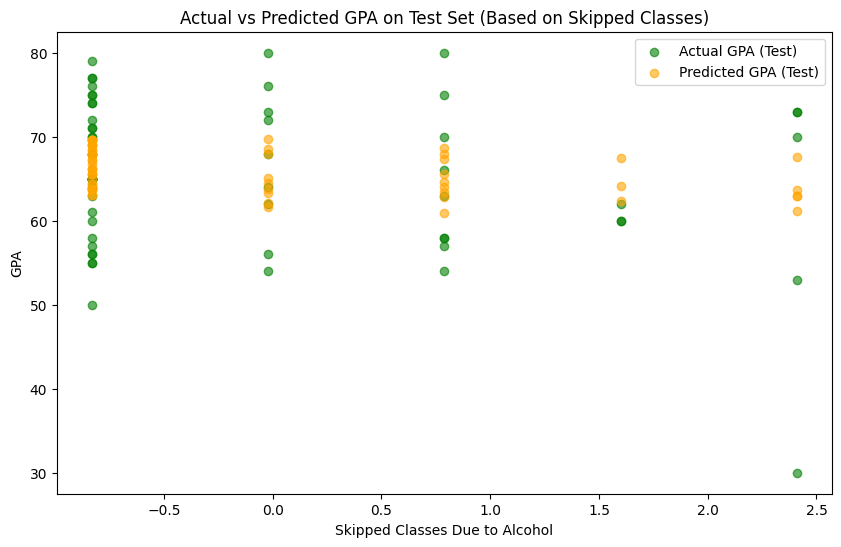

In [27]:
# Visualizing the Test set results for GPA vs. Skipped Classes
plt.figure(figsize=(10, 6))

# Scatter plot of actual GPAs in the test set against skipped classes
plt.scatter(x_test[:, 2], y_test, color='green', label='Actual GPA (Test)', alpha=0.6)

# Scatter plot of predicted GPAs in the test set against skipped classes
plt.scatter(x_test[:, 2], y_pred, color='orange', label='Predicted GPA (Test)', alpha=0.6)

# Add titles and labels
plt.title('Actual vs Predicted GPA on Test Set (Based on Skipped Classes)')
plt.xlabel('Skipped Classes Due to Alcohol')
plt.ylabel('GPA')
plt.legend()

# Show the plot
plt.show()


In [28]:
import plotly.express as px
import pandas as pd

# Assuming x_test, y_test, and y_pred are defined
# Convert data to a DataFrame for easier plotting
results_df = pd.DataFrame({
    'Skipped Classes Due to Alcohol': x_test[:, 2],  # Assuming index 2 corresponds to skipped classes
    'Actual GPA': y_test,
    'Predicted GPA': y_pred
})

# Create the scatter plot
fig = px.scatter(results_df,
                 x='Skipped Classes Due to Alcohol',
                 y='Actual GPA',
                 color='Predicted GPA',
                 title='Actual vs Predicted GPA on Test Set (Based on Skipped Classes)',
                 labels={'Skipped Classes Due to Alcohol': 'Skipped Classes Due to Alcohol',
                         'Actual GPA': 'GPA'},
                 hover_data=['Predicted GPA'])

# Add a second scatter trace for predicted GPA
fig.add_scatter(x=results_df['Skipped Classes Due to Alcohol'],
                 y=results_df['Predicted GPA'],
                 mode='markers',
                 name='Predicted GPA',
                 marker=dict(color='orange', opacity=0.6))

# Show the plot
fig.show()


## Visualization

In [29]:
# Select relevant columns for the Parallel Categories plot
parallel_data = df[['Gender', 'Number of drinks', 'Skipped classes because of alcohol', '2023 year GPA, %']]

# Create the Parallel Categories plot
fig = px.parallel_categories(parallel_data,
                              dimensions=['Gender', 'Number of drinks', 'Skipped classes because of alcohol', '2023 year GPA, %'],
                              title='Parallel Categories Plot',
                              color='2023 year GPA, %',  # Color by GPA for context
                              color_continuous_scale=px.colors.sequential.Inferno,
                              labels={
                                  'Gender': 'Gender',
                                  'Number of drinks': 'Number of Drinks',
                                  'Skipped classes because of alcohol': 'Skipped Classes',
                                  '2023 year GPA, %': 'GPA (2023)'
                              })

# Adjust layout for better clarity
fig.update_layout(
    title_font=dict(size=20),
    margin=dict(l=0, r=0, t=50, b=0),  # Adjust margins for better spacing
)

# Show the plot
fig.show()

import plotly.express as px

# Assuming 'df' is your DataFrame with the relevant columns

# Create a heatmap for Number of Drinks vs GPA vs Skipped Classes
# We will create a pivot table to structure the data for heatmap visualization
heatmap_data = df.groupby(['Number of drinks', '2023 year GPA, %', 'Skipped classes because of alcohol']).size().reset_index(name='Count')

# Create the heatmap
heatmap_fig = px.density_heatmap(heatmap_data,
                                   x='Number of drinks',
                                   y='2023 year GPA, %',
                                   z='Count',  # This represents the density or count of occurrences
                                   color_continuous_scale=px.colors.sequential.Inferno,
                                   title='Heatmap of Number of Drinks, GPA, and Skipped Classes Due to Alcohol')

# Adjust layout for better clarity
heatmap_fig.update_layout(
    xaxis_title='Number of Drinks',
    yaxis_title='2023 Year GPA (%)',
    margin=dict(l=40, r=40, t=50, b=40)
)

# Show the heatmap
heatmap_fig.show()



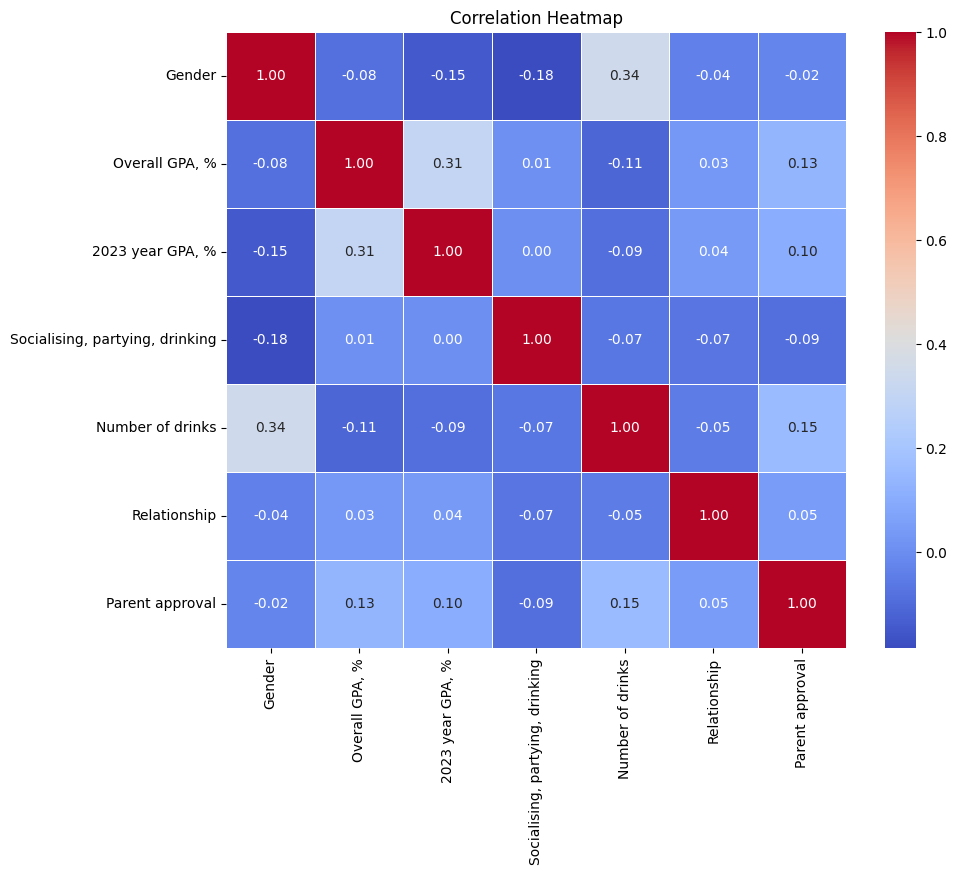

In [30]:
# Calculate the average GPA based on the number of drinks
avg_gpa_drinks = df.groupby('Number of drinks')['2023 year GPA, %'].mean().reset_index()

# Scatter plot to show relationship between Number of drinks and GPA
fig_scatter = px.scatter(
    avg_gpa_drinks,
    x='Number of drinks',
    y='2023 year GPA, %',
    title='Average GPA vs. Number of Drinks',
    labels={'Number of drinks': 'Number of Drinks', '2023 year GPA, %': 'Average GPA'},
    trendline='ols'  # Adding a trendline
)
fig_scatter.show()

# Heatmap to visualize correlations between numeric features
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Box plot to visualize the distribution of GPA across different levels of drinking
fig_box = px.box(
    df,
    x='Number of drinks',
    y='2023 year GPA, %',
    title='GPA Distribution by Number of Drinks',
    labels={'Number of drinks': 'Number of Drinks', '2023 year GPA, %': 'GPA'},
    points='all'  # Show all points
)
fig_box.show()

# Bar plot to compare average GPA across different socializing levels
# Create a mapping for socializing levels
socializing_labels = {
    0: 'Rarely',
    1: 'Occasionally',
    2: 'Frequently',
    3: 'Very Frequently'
}

# Assuming socializing levels are encoded as integers
avg_gpa_socializing = df.groupby('Socialising, partying, drinking')['2023 year GPA, %'].mean().reset_index()

# Replace the encoded values with descriptive names
avg_gpa_socializing['Socialising, partying, drinking'] = avg_gpa_socializing['Socialising, partying, drinking'].map(socializing_labels)

fig_bar = px.bar(
    avg_gpa_socializing,
    x='Socialising, partying, drinking',
    y='2023 year GPA, %',
    title='Average GPA by Socializing Level',
    labels={'Socialising, partying, drinking': 'Socializing Level', '2023 year GPA, %': 'Average GPA'},
    color='2023 year GPA, %',
    text='2023 year GPA, %'  # Display GPA values on the bars
)
fig_bar.show()
